# 最佳路徑的規劃說明 EMCT

- 定義何謂最佳路徑
- 最短路徑演算法
- 權重與約束條件
- 以OSM路網圖資為例

# 定義何謂最佳路徑

本專案中，最佳路徑之使用情境為: **給定載運條件與起、迄點，找到一條 成本最小/效益最大的路線** </br >
其中，衡量條件包含但不限於以下項目:
1. 距離
2. 道路限制
3. 路口數、轉彎次數
4. 路況

項目1、3 為典型求最短路徑的最佳化問題，而項目2、4則取決於路網圖資訊的完整度、即時性，屬於最短路徑的加權問題。</br >
首先，聚焦在項目1、3等最短路徑演算的說明。

# 最短路徑演算法

## Dijkstra's 演算法
是由荷蘭電腦科學家艾茲 Edsger W. Dijkstra在1956年發現的演算法，並於3年後在期刊上發表。Dijkstra演算法使用類似廣度優先搜尋的方法解決賦權圖的單源最短路徑問題。</br >
該演算法存在很多變體：Dijkstra的原始版本僅適用於找到兩個頂點之間的最短路徑，後來更常見的變體固定了一個頂點作為源結點然後找到該頂點到圖中所有其它結點的最短路徑，產生一個最短路徑樹。
該演算法解決了$G=<V,E>$帶權的單源最短路徑問題。具體來說，Dijkstra拉演算法設定了一頂點集合$S$，在集合$S$中所有的頂點與源點$s$之間的最終最短路徑權值均已確定。演算法反覆選擇最短路徑估計最小的點$u\in {V-S}$並將$u$加入$S$中。該演算法常用於路由演算法或者作為其他圖演算法的一個子模組。舉例來說，如果圖中的頂點表示城市，而邊上的權重表示城市間開車行經的距離，該演算法可以用來找到兩個城市之間的最短路徑。</br >
使用限制為:絕大多數的Dijkstra演算法不能有效處理帶有負權邊的圖。</br >
![](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)</br >
>Dijkstra 演算法執行演示（找到A，B之間的最短路徑），演算法每次取出未存取結點中距離最小的，用該結點更新其他結點的距離。在演示過程中存取過的結點會被標為紅色。

## Bellman–Ford 演算法

由Richard Bellman 和 Lester Ford 所創立。它的原理是對圖進行  $|V|-1$次鬆弛操作(可雙向操作)，得到所有可能的最短路徑。其優於Dijkstra演算法的方面是邊的權值可以為負數、實現簡單，缺點是時間複雜度過高，高達$O(|V||E|)$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Bellman%E2%80%93Ford_algorithm_example.gif/220px-Bellman%E2%80%93Ford_algorithm_example.gif)</br >
>Bellman–Ford 演算法執行演示（找到s，V4之間的最短路徑），演算法每次取出未存取結點中距離最小的，而結點之間會因為方向性而有不同的權重(且允許權重為負數)，用該結點更新其他結點的距離。在演示過程中存取過的結點會被標為灰色。

上述二種最短路徑演算法，於邊的權重為皆為正時效果相同，且 Dijkstra 時間複雜度優於 Bellman–Ford。</br >
若邊的權重存在負數，則無法使用Dijkstra進行演算，兩者的使用時機端看邊權重的設計機制，下一節將說明如何在最短路徑中考量**權重與約束條件**

# 權重與約束條件
最短路徑問題是圖論中求兩個頂點之間的最短路徑問題，通常是求最短加權路徑。
</br ></br >
條件最短路徑，指帶有約束條件、限制條件的最短路徑。例如，**頂點約束**: 包括必經點或禁止點的限制；**邊的約束**: 包括必經路段或禁止路段；還包括**無權路徑長度的限制**: 即經過幾步到達終點。進一步地，還有雙目標限制的最短路徑問題，求最短距離中花費最小的路線；交通限制條件下的最短路徑問題，需要考慮轉向限制和延誤的約束。
</br ></br >
以下圖為例: 起點為**節點0**，終點為**節點17**，其中各節點之間(邊)有不同的成本/權重，象徵路段的長度、路況等綜合成本，且途中必須經過**邊2~4**、**邊13~14**、**節點7**、**節點12**，而不能經過**邊11~12**。</br >
![](https://i.imgur.com/eiT0vAy.png)
</br ></br >
考量權重與約束條件的最短路徑，即為**最佳路徑**，如下圖演算結果所示:</br >
![](https://i.imgur.com/28rYzBG.png)


# 以OSM路網圖資為例
以實際路網圖來實踐最佳路徑的演算，規劃階段本專案使用 **OpenStreetMap（開放街圖，簡稱OSM）** 的開放路網圖資進行POC
> **OpenStreetMap（開放街圖，簡稱OSM）**</br >是自由而且開源的全球地圖，於2004 年由英國的Steve Coast 發起，採用類似Wiki 的協作編輯以及開放的授權與格式，以社群之力產生接近專業地理資訊水準的地圖。

In [1]:
import warnings
warnings.filterwarnings('ignore')

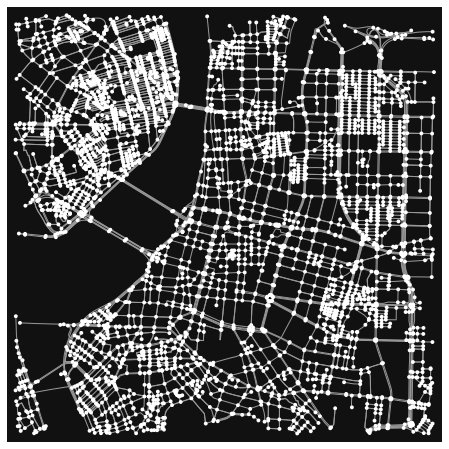

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
import networkx as nx
import osmnx as ox

G = ox.graph_from_point((25.048545,121.51123), dist=3000, network_type='drive') # 以台北市為例
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G) # 取得各 節點 線段 資訊
ox.plot_graph(G) # 抓取OSM路網圖資

In [3]:
# 設定測試的路徑起、迄點
origin = ox.distance.nearest_nodes(G, Y=25.04757667950531, X=121.51659363968007) #起點:台北車站 
destination = ox.distance.nearest_nodes(G, Y=25.05195422941843, X=121.53316660744505) #迄點:捷運松江南京

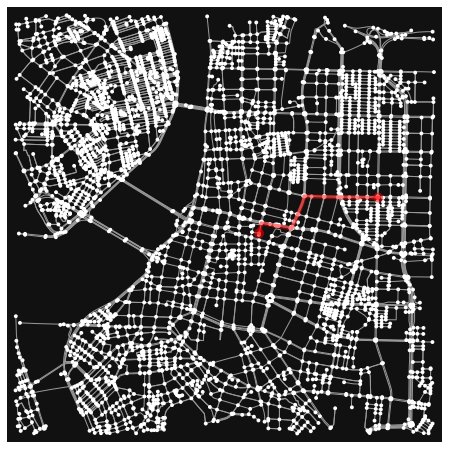

>> 總距離:2144.302公尺


In [4]:
# dijkstra 算法
route = nx.shortest_path(G, origin, destination, weight="length", method='dijkstra')
ox.plot_graph_route(G, route)
route_length = nx.shortest_path_length(G, origin, destination, weight="length", method='dijkstra')

print(f">> 總距離:{route_length}公尺")

ox.folium.plot_route_folium(G, route)

In [5]:
# 顯示過程路名、距離
for s,d in zip(route,route[1:]):
    print(G.edges[(s, d, 0)]["name"], G.edges[(s, d, 0)]["length"])

承德路一段 149.45999999999998
市民大道一段 219.844
市民大道一段 29.531
市民大道一段 170.951
市民大道一段 9.776
市民大道一段 6.602
中山北路一段 21.435
中山北路一段 201.661
中山北路一段 275.33799999999997
南京東路一段 8.068
南京東路一段 96.13
南京東路一段 176.56599999999997
南京東路一段 7.64
南京東路一段 190.677
南京東路一段 24.29
南京東路二段 32.89
南京東路二段 110.39
南京東路二段 112.23400000000001
南京東路二段 142.909
南京東路二段 144.965
南京東路二段 12.945


In [6]:
# 顯示節點資訊 可用於判斷方向
for n in route:
    print(n,G.nodes[n])

662314747 {'y': 25.0473608, 'x': 121.5161174, 'street_count': 3}
965531289 {'y': 25.0486678, 'x': 121.5164607, 'highway': 'traffic_signals', 'street_count': 4}
965531269 {'y': 25.0483347, 'x': 121.5186117, 'street_count': 3}
7495435651 {'y': 25.0482935, 'x': 121.5189013, 'street_count': 3}
656416182 {'y': 25.0480266, 'x': 121.5205722, 'highway': 'traffic_signals', 'street_count': 4}
656416393 {'y': 25.0480066, 'x': 121.5206667, 'highway': 'traffic_signals', 'street_count': 4}
656416081 {'y': 25.0479956, 'x': 121.5207311, 'highway': 'traffic_signals', 'street_count': 4}
656416082 {'y': 25.048172, 'x': 121.5208169, 'highway': 'traffic_signals', 'street_count': 4}
656416084 {'y': 25.0498203, 'x': 121.5216518, 'highway': 'traffic_signals', 'street_count': 4}
656416087 {'y': 25.0521506, 'x': 121.5225599, 'highway': 'traffic_signals', 'street_count': 4}
656416189 {'y': 25.0521418, 'x': 121.5226394, 'highway': 'traffic_signals', 'street_count': 4}
656415974 {'y': 25.0521204, 'x': 121.5235934,

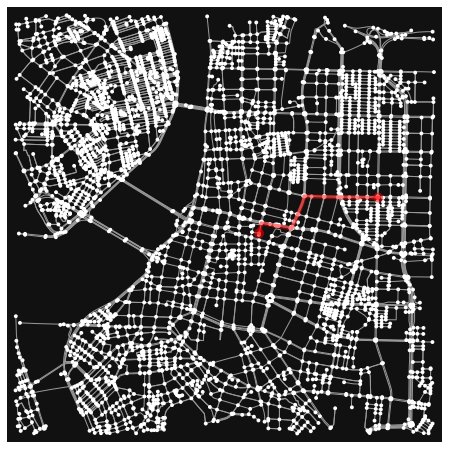

>> 總距離:2144.302公尺


In [7]:
# bellman-ford 算法
route = nx.shortest_path(G, origin, destination, weight="length", method='bellman-ford')
ox.plot_graph_route(G, route)
route_length = nx.shortest_path_length(G, origin, destination, weight="length", method='bellman-ford')

print(f">> 總距離:{route_length}公尺")

ox.folium.plot_route_folium(G, route)

In [8]:
# 顯示過程路名
for s,d in zip(route,route[1:]):
    print(G.edges[(s, d, 0)]["name"],(s,d), G.edges[(s, d, 0)]["length"])

承德路一段 (662314747, 965531289) 149.45999999999998
市民大道一段 (965531289, 965531269) 219.844
市民大道一段 (965531269, 7495435651) 29.531
市民大道一段 (7495435651, 656416182) 170.951
市民大道一段 (656416182, 656416393) 9.776
市民大道一段 (656416393, 656416081) 6.602
中山北路一段 (656416081, 656416082) 21.435
中山北路一段 (656416082, 656416084) 201.661
中山北路一段 (656416084, 656416087) 275.33799999999997
南京東路一段 (656416087, 656416189) 8.068
南京東路一段 (656416189, 656415974) 96.13
南京東路一段 (656415974, 656416271) 176.56599999999997
南京東路一段 (656416271, 656416110) 7.64
南京東路一段 (656416110, 656416035) 190.677
南京東路一段 (656416035, 631822170) 24.29
南京東路二段 (631822170, 654299592) 32.89
南京東路二段 (654299592, 656132486) 110.39
南京東路二段 (656132486, 638213093) 112.23400000000001
南京東路二段 (638213093, 656132508) 142.909
南京東路二段 (656132508, 632569632) 144.965
南京東路二段 (632569632, 632569633) 12.945


在僅考量路線長度之下，兩個演算法結果相同，而dijkstra 花費3.7秒，bellman-ford花費4.1秒

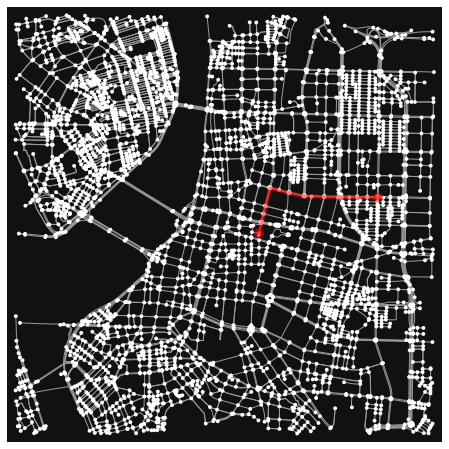

>> 總距離:2226.443公尺


In [9]:
# 假設 中山北路一段 無法通行

g = G.copy()

# 移除 中山北路一段 的路網
roads = ["中山北路一段"]
for road in roads:
    nodes = []
    for edge in gdf_edges[gdf_edges["name"].isin([road])].index:
        nodes.append(edge[0])
        g.remove_edge(*edge)

    for node in nodes[:-20]:
        g.remove_node(node)

# dijkstra
route = nx.shortest_path(g, origin, destination, weight="length", method='dijkstra')
ox.plot_graph_route(g, route)

route_length = nx.shortest_path_length(g, origin, destination, weight="length", method='dijkstra')
print(f">> 總距離:{route_length}公尺")

ox.folium.plot_route_folium(g, route)

In [10]:
# 顯示過程路名
for s,d in zip(route,route[1:]):
    print(G.edges[(s, d, 0)]["name"],(s,d), G.edges[(s, d, 0)]["length"])

承德路一段 (662314747, 965531289) 149.45999999999998
承德路一段 (965531289, 662314760) 22.393
承德路一段 (662314760, 385077754) 118.41100000000002
承德路一段 (385077754, 656416258) 113.60000000000001
承德路一段 (656416258, 662162026) 262.6
南京西路 (662162026, 2142307097) 265.535
南京西路 (2142307097, 2137955730) 17.851
南京西路 (2137955730, 656416177) 203.64600000000002
南京西路 (656416177, 656416254) 8.221
南京東路一段 (656416254, 656416087) 5.022
南京東路一段 (656416087, 656416189) 8.068
南京東路一段 (656416189, 656415974) 96.13
南京東路一段 (656415974, 656416271) 176.56599999999997
南京東路一段 (656416271, 656416110) 7.64
南京東路一段 (656416110, 656416035) 190.677
南京東路一段 (656416035, 631822170) 24.29
南京東路二段 (631822170, 654299592) 32.89
南京東路二段 (654299592, 656132486) 110.39
南京東路二段 (656132486, 638213093) 112.23400000000001
南京東路二段 (638213093, 656132508) 142.909
南京東路二段 (656132508, 632569632) 144.965
南京東路二段 (632569632, 632569633) 12.945


In [11]:
# g.edges[(25423587, 4596838870, 0)]

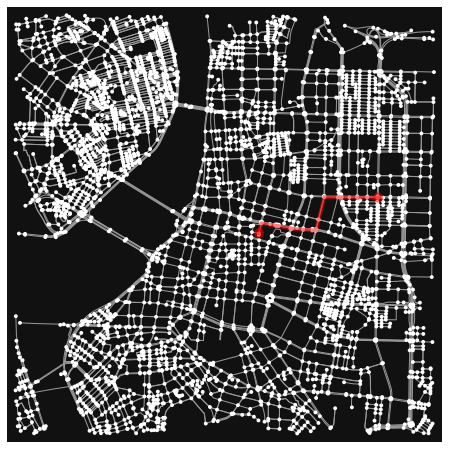

>> 總距離:1961.9325公尺


In [12]:
# 假設  中山北路交通阻塞、林森北路 交通順暢

g = G.copy()

# 堵車 距離*1.5
weight = 1.5
roads = ["中山北路一段"]
for road in roads:
    for edge in gdf_edges[gdf_edges["name"].isin([road])].index:
        g.edges[edge]["length"] = g.edges[edge]["length"]*weight

# 順暢 距離*0.5
weight = 0.5
roads = ["林森北路"]
for road in roads:
    for edge in gdf_edges[gdf_edges["name"].isin([road])].index:
        g.edges[edge]["length"] = g.edges[edge]["length"]*weight        
        

# dijkstra
route = nx.shortest_path(g, origin, destination, weight="length", method='dijkstra')
ox.plot_graph_route(g, route)

route_length = nx.shortest_path_length(g, origin, destination, weight="length", method='dijkstra')
print(f">> 總距離:{route_length}公尺")

ox.folium.plot_route_folium(g, route)

In [13]:
# 顯示過程路名
for s,d in zip(route,route[1:]):
    print(g.edges[(s, d, 0)]["name"],(s,d), g.edges[(s, d, 0)]["length"])

承德路一段 (662314747, 965531289) 149.45999999999998
市民大道一段 (965531289, 965531269) 219.844
市民大道一段 (965531269, 7495435651) 29.531
市民大道一段 (7495435651, 656416182) 170.951
市民大道一段 (656416182, 656416393) 9.776
市民大道一段 (656416393, 656416081) 6.602
市民大道一段 (656416081, 656416206) 9.093
市民大道二段 (656416206, 965533220) 158.274
市民大道二段 (965533220, 3196999070) 131.716
市民大道二段 (3196999070, 656416323) 44.697
市民大道二段 (656416323, 655375381) 11.706
林森北路 (655375381, 656416103) 10.8655
林森北路 (656416103, 656416106) 70.518
林森北路 (656416106, 656416110) 167.599
南京東路一段 (656416110, 656416035) 190.677
南京東路一段 (656416035, 631822170) 24.29
南京東路二段 (631822170, 654299592) 32.89
南京東路二段 (654299592, 656132486) 110.39
南京東路二段 (656132486, 638213093) 112.23400000000001
南京東路二段 (638213093, 656132508) 142.909
南京東路二段 (656132508, 632569632) 144.965
南京東路二段 (632569632, 632569633) 12.945
